<a href="https://colab.research.google.com/github/AdarshShrivastava29/Face-Mask-Detection/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data					 face-mask-dataset.zip	kaggle.json
face-expression-recognition-dataset.zip  images			sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1519.jpg', 'with_mask_2904.jpg', 'with_mask_1986.jpg', 'with_mask_1355.jpg', 'with_mask_505.jpg']
['with_mask_3474.jpg', 'with_mask_2262.jpg', 'with_mask_2217.jpg', 'with_mask_2418.jpg', 'with_mask_3224.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2292.jpg', 'without_mask_2520.jpg', 'without_mask_3446.jpg', 'without_mask_1174.jpg', 'without_mask_2341.jpg']
['without_mask_1969.jpg', 'without_mask_550.jpg', 'without_mask_3592.jpg', 'without_mask_3232.jpg', 'without_mask_2928.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images

with mask --> 1

without mask -->0 **

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


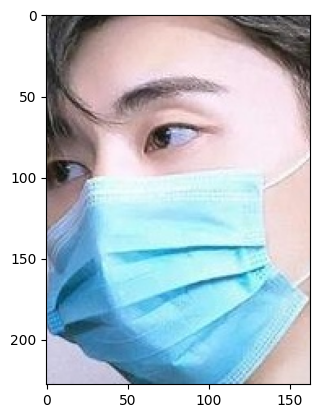

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

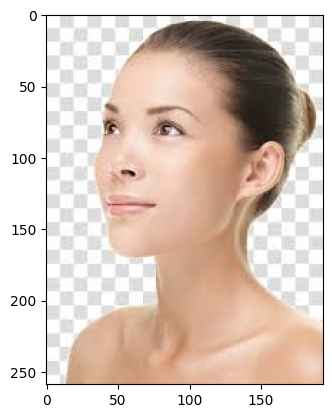

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1)Resize the Images

2)Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 64,  71,  87],
        [ 60,  68,  84],
        [ 58,  67,  82],
        ...,
        [  2,   4,   3],
        [  4,   6,   4],
        [  5,   7,   4]],

       [[ 63,  73,  85],
        [ 62,  72,  84],
        [ 61,  72,  84],
        ...,
        [  4,   6,   5],
        [  6,   8,   7],
        [  8,  10,   7]],

       [[ 59,  73,  82],
        [ 58,  72,  81],
        [ 57,  72,  81],
        ...,
        [  3,   5,   4],
        [  6,   8,   7],
        [  7,   9,   8]],

       ...,

       [[199, 179, 180],
        [205, 185, 186],
        [209, 189, 189],
        ...,
        [194, 211, 228],
        [197, 213, 228],
        [198, 214, 227]],

       [[210, 190, 191],
        [205, 185, 186],
        [198, 178, 178],
        ...,
        [198, 214, 232],
        [199, 214, 228],
        [198, 212, 225]],

       [[204, 184, 185],
        [197, 177, 179],
        [191, 171, 172],
        ...,
        [203, 220, 237],
        [201, 216, 231],
        [198, 211, 227]]], dtype=uint8)
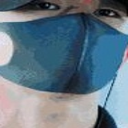

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 65,  94, 110],
        [ 66,  95, 111],
        [ 60,  89, 105],
        ...,
        [ 18,  36,  47],
        [ 16,  34,  46],
        [ 14,  32,  44]],

       [[ 69, 101, 116],
        [ 63,  95, 110],
        [ 58,  89, 103],
        ...,
        [ 17,  35,  47],
        [ 16,  34,  46],
        [ 15,  33,  45]],

       [[ 59,  92, 105],
        [ 59,  93, 105],
        [ 53,  86,  98],
        ...,
        [ 16,  34,  46],
        [ 16,  34,  46],
        [ 15,  33,  45]],

       ...,

       [[252, 255, 255],
        [252, 255, 255],
        [252, 255, 254],
        ...,
        [219, 248, 239],
        [223, 251, 241],
        [226, 253, 242]],

       [[252, 255, 255],
        [252, 255, 255],
        [252, 255, 254],
        ...,
        [191, 229, 215],
        [189, 225, 209],
        [186, 221, 204]],

       [[252, 255, 255],
        [252, 255, 255],
        [252, 255, 254],
        ...,
        [124, 167, 151],
        [112, 152, 135],
        [104, 143, 125]]], dtype=uint8)
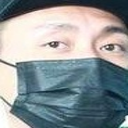

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.25490196, 0.36862745, 0.43137255],
        [0.25882353, 0.37254902, 0.43529412],
        [0.23529412, 0.34901961, 0.41176471],
        ...,
        [0.07058824, 0.14117647, 0.18431373],
        [0.0627451 , 0.13333333, 0.18039216],
        [0.05490196, 0.1254902 , 0.17254902]],

       [[0.27058824, 0.39607843, 0.45490196],
        [0.24705882, 0.37254902, 0.43137255],
        [0.22745098, 0.34901961, 0.40392157],
        ...,
        [0.06666667, 0.1372549 , 0.18431373],
        [0.0627451 , 0.13333333, 0.18039216],
        [0.05882353, 0.12941176, 0.17647059]],

       [[0.23137255, 0.36078431, 0.41176471],
        [0.23137255, 0.36470588, 0.41176471],
        [0.20784314, 0.3372549 , 0.38431373],
        ...,
        [0.0627451 , 0.13333333, 0.18039216],
        [0.0627451 , 0.13333333, 0.18039216],
        [0.05882353, 0.12941176, 0.17647059]],

       ...,

       [[0.98823529, 1.        , 1.        ],
        [0.98823529, 1.        , 1.        ],
        [0.98823529, 1

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 24ms/step - loss: 0.6354 - acc: 0.7019 - val_loss: 0.2717 - val_acc: 0.8975
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.3068 - acc: 0.8799 - val_loss: 0.1937 - val_acc: 0.9289
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2406 - acc: 0.9034 - val_loss: 0.2025 - val_acc: 0.9306
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2129 - acc: 0.9117 - val_loss: 0.1613 - val_acc: 0.9388
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1760 - acc: 0.9314 - val_loss: 0.1770 - val_acc: 0.9355


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2045 - acc: 0.9272
Test Accuracy = 0.9272005558013916


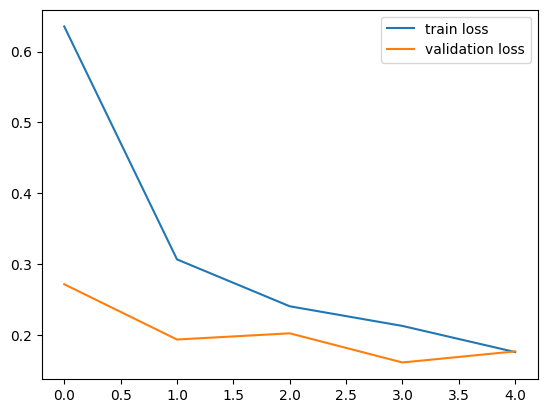

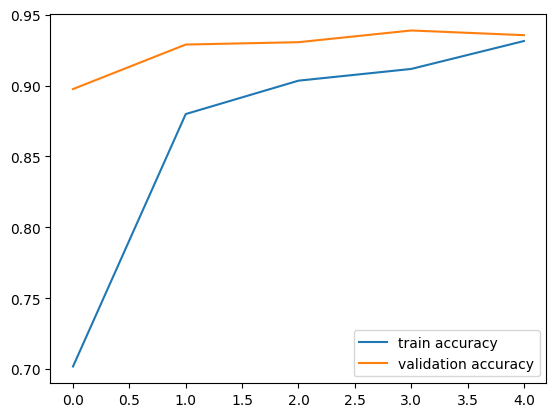

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/308-with-mask.jpg


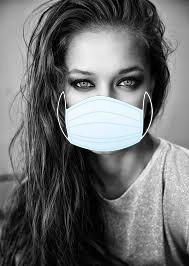

1/1 [==============================] - 0s 29ms/step
[[0.32784212 0.76265603]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')



Path of the image to be predicted: /content/409.jpg


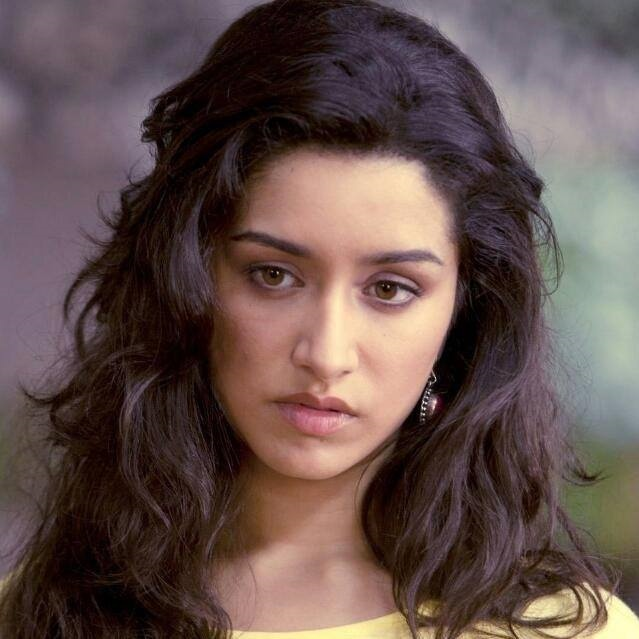

1/1 [==============================] - 0s 34ms/step
[[0.18093947 0.8631757 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')